### Lithography notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Dose of exposition

In order to do the development correctly, the dose of the exposition needs to be chosen with care.



C:\Users\maxim\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


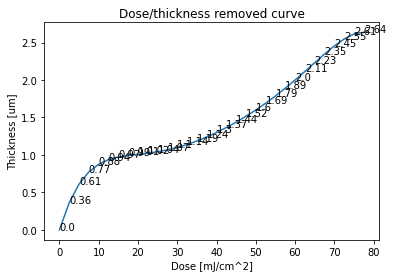

In [2]:
from scipy import interpolate
import matplotlib.pyplot as plt
import math

dose = np.arange(0, 80, 2.5, float) #determine the number of points and the values, for the interpolation
thickness= -3.08555*10**-10*dose**6 + 7.88354*10**-8*dose**5-8.17055*10**-6*dose**4+0.000437742*dose**3-0.012214*dose**2+0.173364*dose+0
for i,j in zip(dose, thickness):
    plt.text(i, j, round(float(j),2))
    
plt.title('Dose/thickness removed curve')
plt.plot(dose, thickness)
plt.ylabel('Thickness [um]')
plt.xlabel('Dose [mJ/cm^2]')
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML
import pandas as pd

new_thickness = np.append(0,thickness)

init_Si_thickness = 2
SiO2_thickness = 0.5*init_Si_thickness
y_lim = 10
opening = 0.3 #um
#opening = opening/101600 #convert it on the image

fig, ax = plt.subplots(figsize=(12, 6))
# Set up the plot elements

silicon = plt.Rectangle((0, 0), 1, init_Si_thickness, color='darkblue', label='Silicon')
silicon_oxide = plt.Rectangle((0, init_Si_thickness), 1, SiO2_thickness, color='darkorange', label='Silicon oxide')
resist = plt.Rectangle((0, init_Si_thickness+SiO2_thickness), 1, init_Si_thickness, color='red', label='Resist')
resist_downward_1 = plt.Rectangle((0.1, silicon.get_height()+silicon_oxide.get_height()+resist.get_height()), opening, 0.0, color='white', label='Resist development')
resist_downward_2 = plt.Rectangle((0.6, silicon.get_height()+silicon_oxide.get_height()+resist.get_height()), opening, 0.0, color='white', label='Resist development')

ax.add_patch(silicon)
ax.add_patch(silicon_oxide)
ax.add_patch(resist)
ax.add_patch(resist_downward_1)
ax.add_patch(resist_downward_2)

# Set up the axes and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, y_lim)
ax.legend()

# Add title to the plot
title = ax.set_title('Deal-Grove Model')
title.set_position([.5, 1.1]) # Adjust position of the title
title.set_fontsize(10) # Adjust font size of the title
def update(frame):
    dev_thickness = new_thickness[frame]
    if(dev_thickness > resist.get_height()):
        print('All the resist has been consumed with a dose of ' + str(dose[frame]) + 'mJ/cm^2')
        dev_thickness = resist.get_height()
    resist_downward_1.set_height(dev_thickness)
    resist_downward_1.set_y(silicon.get_height()+silicon_oxide.get_height()+resist.get_height() - dev_thickness)
    resist_downward_2.set_height(dev_thickness)
    resist_downward_2.set_y(silicon.get_height()+silicon_oxide.get_height()+resist.get_height() - dev_thickness)
    ax.set_ylim(0,y_lim)
    ax.set_yticks([0, silicon.get_height()+silicon_oxide.get_height()+resist.get_height(),silicon.get_height()+silicon_oxide.get_height()+resist.get_height()-dev_thickness])
    ax.set_ylim(0,y_lim)
    ax.set_yticklabels([0, 0,f"{dev_thickness:.2f} µm (dev)"])

    
ani = FuncAnimation(fig, update, frames=len(thickness), interval=100, repeat=False)

plt.close()
# Display the animation in JupyterLab
html_code = ani.to_jshtml()
centered_html = f'<div style="display: flex; justify-content: center;">{html_code}</div>'
display(HTML(centered_html))

All the resist has been consumed with a dose of 65.0mJ/cm^2
All the resist has been consumed with a dose of 67.5mJ/cm^2
All the resist has been consumed with a dose of 70.0mJ/cm^2
All the resist has been consumed with a dose of 72.5mJ/cm^2
All the resist has been consumed with a dose of 75.0mJ/cm^2
All the resist has been consumed with a dose of 77.5mJ/cm^2


In [6]:
# Parameters
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Accuracy = 8           # Degree of accuracy (integer, higher means more time more accurate)
N = 250  # Resolution
lamda = 0.1            # Wavelength (um)
TH = 0.4               # Threshold intensity (normalized)
NA = 0.85              # Numerical aperature
L = 0.09               # Smallest possible length in the technology
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Plot normalized light intensity in 3D

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from scipy.fftpack import fft2, ifft2, fftshift
from ipywidgets import interact

# Reading mask shape from file
File = 'example2.txt'   ############ CHANGE MASK HERE
Y = np.loadtxt(File)
X = Y[:,0]
Y = Y[:,1]
num_points = len(X)-1
sides = np.zeros(num_points)
for i in range(num_points):
    sides[i] = np.sqrt((X[i]-X[i+1])**2 + (Y[i]-Y[i+1])**2)
scale = L/np.min(sides)
sides = sides*scale
X = scale*X
Y = scale*Y
X = X-np.min(X)
Y = Y-np.min(Y)
Lx = 1.4*np.max(X)    # Mask real dimensions (um)
Ly = 1.4*np.max(Y)    # Mask real dimensions (um)


def plot_mask(lamda, NA, N):
    # Center the polygon
    x = np.linspace(-0.2*np.max(X),1.2*np.max(X),N)
    y = np.linspace(-0.2*np.max(Y),1.2*np.max(Y),N)
    # Create mask matrix
    x,y = np.meshgrid(x,y)
    x = np.reshape(x,-1)
    y = np.reshape(y,-1)
    mask = Path(np.column_stack((X,Y)))
    mask = mask.contains_points(np.column_stack((x,y)))
    mask = np.reshape(mask,(N,N))
    mask = mask.astype(float)
    # Calculations
    # Creating different domains
    dx = Lx/(N-1)
    dy = Ly/(N-1)
    nx, ny = np.meshgrid(np.arange(-(N-1)/2,(N-1)/2+1),np.arange(-(N-1)/2,(N-1)/2+1))
    fx = (1/dx)*(1/N)*nx
    fy = (1/dx)*(1/N)*ny
    # Discrete frequency domain (1/um)
    P = np.sqrt((fx**2)+(fy**2))
    P = (P < (NA/lamda)).astype(float)
    I = fftshift(fft2(mask))
    I = ifft2(P*I)
    I = np.real(I*np.conj(I))
    I = I/np.max(I)
    aerial = (I > TH).astype(float)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.imshow(mask, cmap='gray', origin='lower')
    ax1.set_title('Mask image')
    ax2.imshow(aerial, cmap='gray', origin='lower')
    ax2.set_title('Aerial image')
    plt.tight_layout()


def update_3D(lamda,NA,N):
    # Center the polygon
    x = np.linspace(-0.2*np.max(X),1.2*np.max(X),N)
    y = np.linspace(-0.2*np.max(Y),1.2*np.max(Y),N)
    # Create mask matrix
    x,y = np.meshgrid(x,y)
    x = np.reshape(x,-1)
    y = np.reshape(y,-1)
    mask = Path(np.column_stack((X,Y)))
    mask = mask.contains_points(np.column_stack((x,y)))
    mask = np.reshape(mask,(N,N))
    mask = mask.astype(float)
    # Calculations
    # Creating different domains
    dx = Lx/(N-1)
    dy = Ly/(N-1)
    nx, ny = np.meshgrid(np.arange(-(N-1)/2,(N-1)/2+1),np.arange(-(N-1)/2,(N-1)/2+1))
    fx = (1/dx)*(1/N)*nx
    fy = (1/dx)*(1/N)*ny
    # Discrete frequency domain (1/um)
    P = np.sqrt((fx**2)+(fy**2))
    P = (P < (NA/lamda)).astype(float)
    I = fftshift(fft2(mask))
    I = ifft2(P*I)
    I = np.real(I*np.conj(I))
    I = I/np.max(I)
    aerial = (I > TH).astype(float)
    return nx, ny, I
    
# Define the function to plot
def plot_func(lamda,NA,N):
    nx, ny, I = update_3D(lamda,NA,N)
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(nx, ny, I, cmap='jet')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    

# Create the slider and plot the function
interact(plot_func, lamda=(0.05, 0.25, 0.05), NA=(0.1,1,0.1), N=(1,500,2))
interact(plot_mask, lamda=(0.05, 0.25, 0.05), NA=(0.1,1,0.1), N=(1,500,2))



interactive(children=(FloatSlider(value=0.15000000000000002, description='lamda', max=0.25, min=0.05, step=0.0…

interactive(children=(FloatSlider(value=0.15000000000000002, description='lamda', max=0.25, min=0.05, step=0.0…

<function __main__.plot_mask(lamda, NA, N)>